# Project: Benchmarking Sorting Algorithms

## Introduction
***

### Concepts of Sorting 

The perpose of this assignment is to use python to evaluate five different sorting algorithims.
Sorting algorithims are used to manipulate data into a desired sequence or order. An example of this would include re-ordering the following list to "sort" it into numerical order.
[6,9,3,4,8,7] -> [3,4,6,8,7,9]
There are a number of different factors to consider when a computer algorithm "sorts" data.
1. Complexity: 

In realation to algorithims, complexity is how the rescources scale with the increasing demand of a larger dataset. As the input sizes increase so to dose the time taken to execute the sort. Space complexity can be seen as the amount of diskspace for the
2. Performance:

Performance can reley on two mayjor factores - time and space.  The performance of the machine being used has  
3. In-place sorting

4. Stable sorting


5. Comparator functions


6. Comparison-based sorts


7. Non-comparison-based sorts


## Sorting Algorithms
***

### Bubble Sort


The bubble sort is said to be one of the most straight forward sorting algorithms comparing the first item in a list with its neighbour to the right and swaping to the desired outcome. The code iterates over the list comparing and moving inputs where required.

The best case for the bubble sort is n where all the values are persorted to the desired scequence, while the worst case is n2 where the number of inputs increase and therfore so to does the time taken to execute the sort. 

Below is an example of the how the Sort works. We are given the "in Array - (6, 2, 1, 3)" the sort is required to output the same list in numerical order (1, 2, 3, 6). The alogrithm begins in position P1 (6) and reviewes the value in P2. Six is greater than two therfore the positions are switched. We then progress to step two P2 (6) is then comparied to P3 (1) and the same switch is carried out. The function iterates over all of the list indexes until the list is sorted at step n.   
 
![Bubble Sort](images/bubble_sort.PNG)

### Merge Sort

1. Space and Time complexity
2. How it works using diagrams
3. Examples

### Count Sort

1. Space and Time complexity
2. How it works using diagrams
3. Examples

### Selection Sort

1. Space and Time complexity
2. How it works using diagrams
3. Examples

### Insertion Sort

1. Space and Time complexity
2. How it works using diagrams
3. Examples

## Implementation & Benchmarking
***

We then carried out the benchmarking of the three above algorithims - Bubble Sort, Merge Sort, Count Sort, Selection Sort and finally Insertion Sort. Firstly importing all the required packages.

In [129]:
#Import packages required
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import time

We then define all the define all the sorting function.

Bubble Sort
***

In [130]:
#The below Bubble sort is adapted from the following website:
#https://www.geeksforgeeks.org/python-program-for-bubble-sort/
def bubble_sort(arr):
    num_in_list = len(arr)
    for i in range(num_in_list):
        for j in range(0, num_in_list-i-1):
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]


Merge Sort
***

In [131]:
#The below Merge sort is adapted from the following website:
#https://www.educative.io/edpresso/merge-sort-in-python
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        merge_sort(left)
        merge_sort(right)
        i = 0
        j = 0
        k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
              
              arr[k] = left[i]
             
              i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
            
        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k]=right[j]
            j += 1
            k += 1

Count Sort
***

In [132]:
#The below Counting sort is adapted from the following website:
#https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-10.php
def count_sort(arr):  
    max_val = max(arr)
    m = max_val + 1
    count = [0] * m                
    for a in arr:
        count[a] += 1             
    i = 0
    for a in range(m):            
        for c in range(count[a]):  
            arr[i] = a
            i += 1
    return arr

Selection Sort
***

In [133]:
# The below Selection sort is adapted from the following website:
#https://www.geeksforgeeks.org/python-program-for-selection-sort/
def selection_sort(arr):
    for i in range(len(arr)): 
        min_idx = i 
        for j in range(i+1, len(arr)): 
            if arr[min_idx] > arr[j]: 
                min_idx = j 
        arr[i], arr[min_idx] = arr[min_idx], arr[i]


Insertion Sort
***

In [134]:
# The below Selection sort is adapted from the following website:
#https://www.geeksforgeeks.org/insertion-sort/
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i] 
        j = i-1
        while j >= 0 and key < arr[j] : 
                arr[j + 1] = arr[j] 
                j -= 1
        arr[j + 1] = key 


Once all five functions are declared we now need random data to sort in various different sizes. The below function generates a random list of numbers of size n.

Generate Random Data
***

In [142]:
#generate random int's in array of lenfth number n
def generate_arr(n):
    arr = np.random.randint(0,100,n).tolist()            # Generate multiple random numbers between 0 and 100 to a list of size n
    return arr

In order to benchamark the sorting algorithims we must execute them and compare them to one another to determine the length of time each function takes. Each function is executed multiple times - changing the input value n for the random data.The below function uses the above random data generater to sort a list of numbers 100,250,500... each list is repeated 10 times to determine an average length of time, in milisecond, the sort takes to complete. The time taken along with sorted list sizes n is added to a list. Each of these datapoints are key to understanding what happens as the input size increase.

In [136]:
####################### BENCHMARKING ###################################################
bench_values_time = []                                                                                      # Here we store the average time taken for each instance of n for each function 

def evaluate(func, run_avg):                                                                                # Decalre the function and the number of running times
    val_n = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]                     # List of n values
    for n in val_n:                                                                                         # Loop through each value for n for the above function
        arr = generate_arr(n)                                                                               # Execute the generate a random list of numbers of length/size n
        start_time = time.time()                                                                            # Declare the start time 
        for i in range(0, run_avg):                                                                         # Loop over the function a number "run_avg" of times
            func(arr)                                                                                       # Execute the Sort with the array of size n
        finish_time = time.time()                                                                           # Declare the start time
        time_elapsed = finish_time - start_time                                                             # Calcualte the time taken for the function to be executed "run_avg" times
        time_elapsed = round((time_elapsed*1000)/run_avg,3)                                                 # Get the average time for one sort rounded to 3 decimal places
        bench_values_time.append([func.__name__, n, time_elapsed])                                          # Add the "function name", "sample size" and "time taken" to the benchmark list
        print(str(n), " Number Size - Time Taken:", time_elapsed)                                           # Print the three above variables to the console


The below main function then brings all the sort and benchmark functions together.

In [137]:
def main():
    function_list = [bubble_sort, merge_sort, count_sort, selection_sort, insertion_sort]
    for fun in function_list:
        print(fun.__name__)
        evaluate(fun, 9)

In [138]:
main()     # We then call the main function

bubble_sort
100  Number Size - Time Taken: 0.999
250  Number Size - Time Taken: 5.332
500  Number Size - Time Taken: 18.544
750  Number Size - Time Taken: 44.308
1000  Number Size - Time Taken: 83.286
1250  Number Size - Time Taken: 116.156
2500  Number Size - Time Taken: 440.193
3750  Number Size - Time Taken: 1052.953
5000  Number Size - Time Taken: 1911.687
6250  Number Size - Time Taken: 2890.682
7500  Number Size - Time Taken: 4258.902
8750  Number Size - Time Taken: 5739.168
10000  Number Size - Time Taken: 7451.188
merge_sort
100  Number Size - Time Taken: 0.222
250  Number Size - Time Taken: 0.998
500  Number Size - Time Taken: 3.22
750  Number Size - Time Taken: 3.553
1000  Number Size - Time Taken: 5.332
1250  Number Size - Time Taken: 5.554
2500  Number Size - Time Taken: 14.438
3750  Number Size - Time Taken: 21.876
5000  Number Size - Time Taken: 29.315
6250  Number Size - Time Taken: 45.641
7500  Number Size - Time Taken: 49.971
8750  Number Size - Time Taken: 53.749
1000

We can then plot the above output in a different table format shown below:

In [139]:
df = pd.DataFrame(bench_values_time)
df.columns = ['Function', 'Sample Size', 'Time Taken']
df_restructure = df.pivot(index='Function', columns='Sample Size', values='Time Taken')
print(df_restructure)

Sample Size     100    250     500     750     1000     1250     2500   \
Function                                                                 
bubble_sort     0.999  5.332  18.544  44.308  83.286  116.156  440.193   
count_sort      0.000  0.113   0.111   0.222   0.222    0.224    1.111   
insertion_sort  0.000  0.335   1.664   3.333   5.885   10.548   40.975   
merge_sort      0.222  0.998   3.220   3.553   5.332    5.554   14.438   
selection_sort  0.446  2.332  12.105  28.650  53.524   78.955  339.919   

Sample Size        3750      5000      6250      7500      8750      10000  
Function                                                                    
bubble_sort     1052.953  1911.687  2890.682  4258.902  5739.168  7451.188  
count_sort         1.555     0.999     2.110     2.665     2.222     1.777  
insertion_sort    95.168   176.899   268.069   386.779   540.803   686.828  
merge_sort        21.876    29.315    45.641    49.971    53.749    62.964  
selection_sort   71

We then plot the data on a graph to gain a better perspective of the sort algorithms behave as the input value n increases.

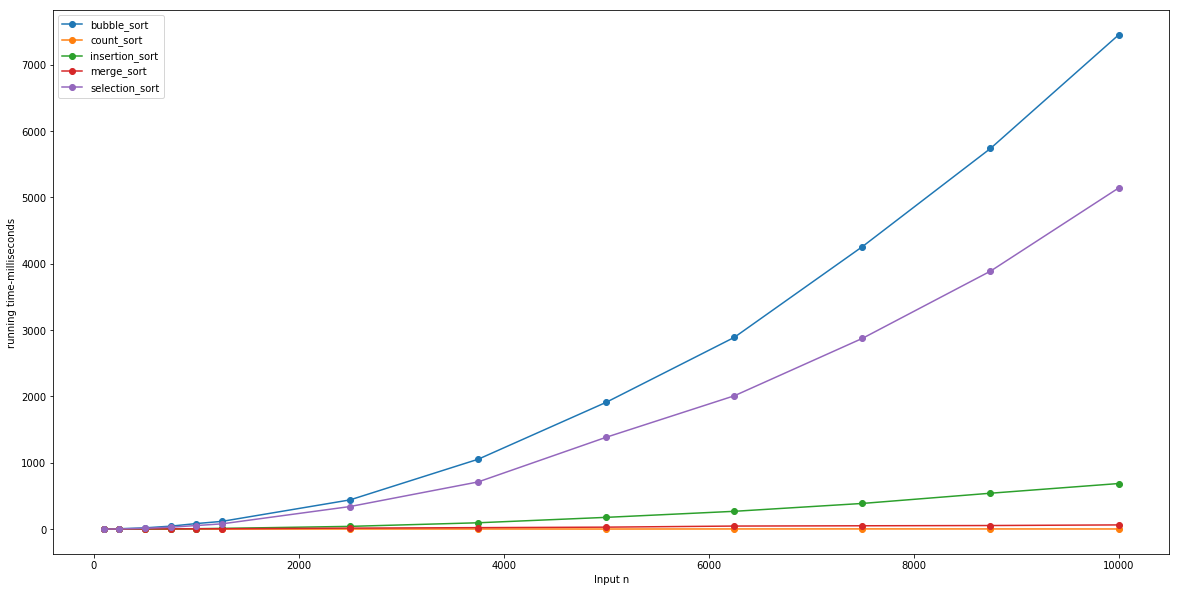

In [140]:
plot = df_restructure.T.iloc[:].plot(style='-o', figsize=(20, 10))
plot.set(xlabel="Input n", ylabel="running time-milliseconds")
plt.legend()
plt.show()

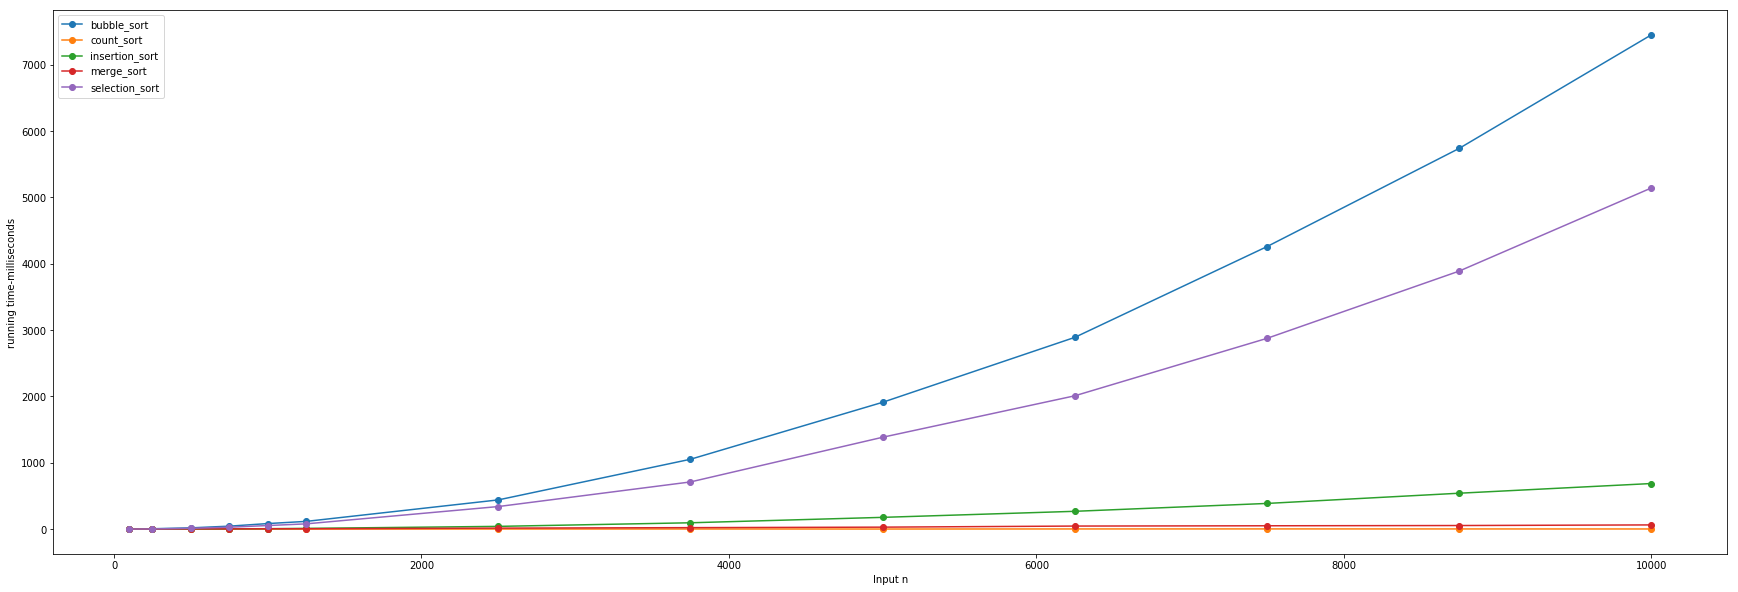

In [141]:
plot = df_restructure.T.iloc[:].plot(style='-o', figsize=(30, 10))
plot.set(xlabel="Input n", ylabel="running time-milliseconds")
plt.legend()
plt.show()